<a href="https://colab.research.google.com/github/nyp-sit/sdaai-pdc1-students/blob/master/ml-essentials/4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification



## MNIST

MNIST is a set of 70,0000 small handwritten images by high school students and employees of the US Census Bureau.  Each image is labeled with the digit it represents.  Scikit-Learn provides helper functions to download popular datasets, and MNIST is one of them.  

In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure where data key contains an array with one row per instance and one column per feature.  The target key contains an array with the label.

In [0]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [0]:
y.shape

(70000,)

There are 70000 images and each image has 784 features, which is 28x28 pixels, and whch feature represent one pixel's intensity from 0 to 255.   Let's take a look at the first digit from the dataset.

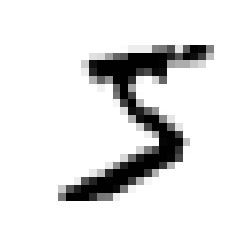

In [0]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [0]:
y[0]
y.dtype

Split the first 60000 images into a training set, and the last 10000 images as a test set.

In [0]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#shuffle_index = np.random.permutation(60000)
#X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary classifier

**Question 1**

Creates a binary classifier capable of distinguishing between just two classes, 5 and not-5.  


*   Creates the target vectors for this classification task
*   Use Logistic Regression and trainit on the whole training set.  
*   Predict the outcome of images of the number 5



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=5, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

array([False])

## Measuring Accuracy using Cross-Validation


**Question 2**

Evaluate the model using cross-validation with the cross_val_score() function, with 3 folds.  

## Confusion Matrix

**Question 3**

A much better way to evaluate the performance of a classifier is to look at the confusion matrix.  


*   Generate a set of predictions on the test set
*   Compute the confusion matrix using the confusion_matrix() function



A perfect classifier would have noly true positives and true negatives, so its confusion matrix would have non zero values only on its main diagonal.

In [0]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

## Precision and Recall

**Question 4**

Compute the precision, recall and F1 score

Calculate the precision manually using the formula,

`precision = TP/(TP+FP)`

In [0]:
4391 / (4391 + 622)

Calculate the recall manually using the formula,

`recall = TP/(TP+FN)`

In [0]:
4391 / (4391 + 1030)

Calculate the F1 score manually using the formula

`F1 = 2*precision*recall/(precision + recall)`

In [0]:
4391 / (4391 + (622 + 1030) / 2)

## Precision and recall tradeoff

Use the decision_function() method to compute the scores.   With a higher threshold, it decreases the recall.  To decide which threshold to use, get the scores of all instances in the training set using the cross_val_predict() function to return decision scores instead of predictions.

In [0]:
y_scores = lr_clf.decision_function([some_digit])
y_scores

array([1.85477559])

With threshold = 0, the prediction is correct.

In [0]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

With threshold = 8000, prediction is wrong.

In [0]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Perform cross validation to get the scores for all instances.

In [0]:
y_scores = cross_val_predict(lr_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

Compute precision and recall for all possible thresholds using the precision_recall_curve function.

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [0]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-4, 4, 0, 1])             

plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

In [0]:
(y_train_pred == (y_scores > 0)).all()

True

In [0]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

We want to aim for 90% precision, compute the threshold value.

In [0]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

0.4003658839573035

In [0]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Compute the precision and recall score

In [0]:
precision_score(y_train_5, y_train_pred_90)

0.9001721170395869

In [0]:
recall_score(y_train_5, y_train_pred_90)

0.7718133185759085

# ROC Curves

The receiver operation characteristic (ROC) curve is another common tool used with binary classifiers.  It is similar to the precision/recall curve, but it plots the true positive rate (recall) against the false positive rate.  

**Question 5**

Compute the True positive rate (TPR), False positive rate (FPR) for various thresholds using the roc_curve() function.

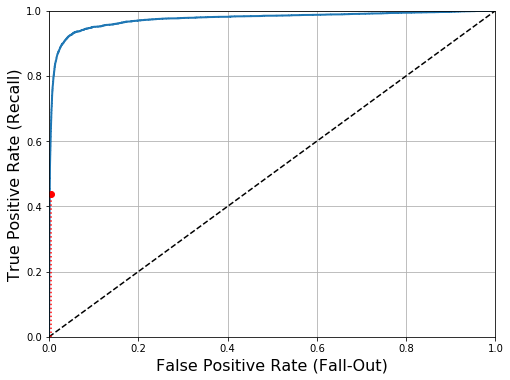

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                        
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
plt.show()

The higher the recall (TPR), the more false positives (FPR) the classifier produces.  The dotted line represents the ROC curve of a purely random classifier, a good classfier stays as far away from the line as possible.

**Quesiton 6**

Compute the area under the curve (AUC).  

0.9744433315674055

# Multiclass classification

Multiclass classifiers distinguish between more than two classess.  Scikit-learn detects when you try to use a binary classification alogorithm for a multiple class classification task and it automatically runs one-versus-all (OvA)

**Question 7**

Use Linear Regression to train the original target classes from 0 to 9 and make a prediction of the first digit.

Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image and selected the class with the highest score.  

**Question 8**

Conpute the scores using the decision_function() method to return 10 scores, one per class.

The highest score is the one corresponding to the correct class.

In [0]:
np.argmax(some_digit_scores)

In [0]:
lr_clf.classes_

In [0]:
lr_clf.classes_[5]

**Question 9**

Use OvO strategy to train and predict the digit.

**Question 10**

Use cross_val_score to evaluate the classifier

**Question 11**

Use Standard Scalar to scale to improve the accuracy of the classifier

**Question 12**

Compute the confusion matrix of the classifier.